In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

## Visualisasi 1

### Kapasitas PLTS

In [3]:
kapasitas_plts = pd.read_excel('vis 1/irena_kapasitas plts.xlsx')

In [4]:
kapasitas_plts.head()

,"Electricity statistics by Country/area, Technology, Data Type, Grid connection and Year",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Solar photovoltaic,Electricity Installed Capacity (MW),All,2024.0,53.96
2,Albania,Solar photovoltaic,Electricity Installed Capacity (MW),All,2024.0,306.73
3,Algeria,Solar photovoltaic,Electricity Installed Capacity (MW),All,2024.0,436.8
4,American Samoa,Solar photovoltaic,Electricity Installed Capacity (MW),All,2024.0,7.11


In [5]:
kapasitas_plts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Electricity statistics by Country/area, Technology, Data Type, Grid connection and Year  235 non-null    object 
 1   Unnamed: 1                                                                               224 non-null    object 
 2   Unnamed: 2                                                                               224 non-null    object 
 3   Unnamed: 3                                                                               224 non-null    object 
 4   Unnamed: 4                                                                               224 non-null    float64
 5   Unnamed: 5                                                       

In [6]:
# hapus kolom 2-4
kapasitas_plts.drop(kapasitas_plts.columns[1:5], axis=1, inplace=True)

In [7]:
# hapus baris 0
kapasitas_plts.drop(index=0, inplace=True)

In [8]:
kapasitas_plts.head()

,"Electricity statistics by Country/area, Technology, Data Type, Grid connection and Year",Unnamed: 5
1,Afghanistan,53.96
2,Albania,306.73
3,Algeria,436.8
4,American Samoa,7.11
5,Andorra,8.73


In [9]:
# ganti nama kolom 0 menjadi 'negara'
kapasitas_plts.rename(columns={kapasitas_plts.columns[0]: 'negara'}, inplace=True)
kapasitas_plts.rename(columns={kapasitas_plts.columns[1]: 'kapasitas plts'}, inplace=True)

In [10]:
kapasitas_plts.head()

,negara,kapasitas plts
1,Afghanistan,53.96
2,Albania,306.73
3,Algeria,436.8
4,American Samoa,7.11
5,Andorra,8.73


ambil yang negara asean aja

In [11]:
# Daftar ASEAN (lowercase)
asean = [
    'indonesia','malaysia','singapore','thailand','philippines',
    'vietnam','myanmar','cambodia','laos','brunei','timor-leste'
]

# Mapping variasi nama → standar
name_fix = {
    'viet nam': 'vietnam',
    'brunei darussalam': 'brunei',
    "lao people's democratic republic": 'laos',
    'lao pdr': 'laos',
    'east timor': 'timor-leste'
}

In [12]:
# Normalisasi: buang " (the)", trim, lowercase, lalu mapping
kapasitas_plts['negara_norm'] = (
    kapasitas_plts['negara']
    .astype(str)
    .str.replace(r'\s*\(the\)\s*', '', regex=True)
    .str.strip()
    .str.lower()
    .replace(name_fix)
)

# Filter ASEAN
kapasitas_plts_sea = kapasitas_plts[kapasitas_plts['negara_norm'].isin(asean)].drop(columns=['negara_norm'])

kapasitas_plts_sea.head(20)

,negara,kapasitas plts
30,Brunei Darussalam,5.2
35,Cambodia,877.59
96,Indonesia,941.79
114,Lao People's Democratic Republic (the),58.1
124,Malaysia,2305.32
139,Myanmar,216
159,Philippines (the),2971.1
183,Singapore,1459
199,Thailand,3382.61
200,Timor-Leste,0.41


C:\Users\Aufii\AppData\Local\Temp\ipykernel_34736\4267509170.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


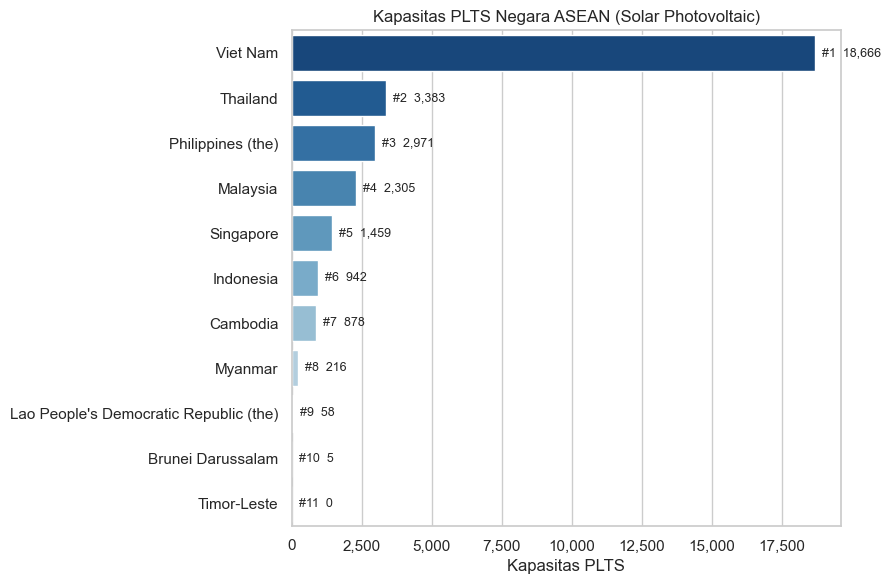

,peringkat,negara,kapasitas plts
0,1,Viet Nam,18666.28
1,2,Thailand,3382.61
2,3,Philippines (the),2971.10
3,4,Malaysia,2305.32
4,5,Singapore,1459.00
5,6,Indonesia,941.79
6,7,Cambodia,877.59
7,8,Myanmar,216.00
8,9,Lao People's Democratic Republic (the),58.10
9,10,Brunei Darussalam,5.20


In [13]:
# Salin data ASEAN yang sudah difilter
df_plot = kapasitas_plts_sea.copy()

# Pastikan kolom 'kapasitas plts' numerik (hapus pemisah/teks lain)
df_plot['kapasitas plts'] = (
    df_plot['kapasitas plts']
    .astype(str)
    .str.replace(r'[^\d\.\-]', '', regex=True)
    .replace({'': None})
    .astype(float)
)

# Buang NaN jika ada
df_plot = df_plot.dropna(subset=['kapasitas plts'])

# Hitung peringkat (semakin besar kapasitas → peringkat 1)
df_plot['peringkat'] = df_plot['kapasitas plts'].rank(method='dense', ascending=False).astype(int)

# Urutkan untuk plotting (dari terbesar ke terkecil)
df_plot = df_plot.sort_values('kapasitas plts', ascending=False)

# Visualisasi bar chart horizontal
sns.set_theme(style='whitegrid')
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=df_plot,
    y='negara', x='kapasitas plts',
    order=df_plot['negara'], palette='Blues_r'
)

# Format axis dan judul
ax.set_title('Kapasitas PLTS Negara ASEAN (Solar Photovoltaic)')
ax.set_xlabel('Kapasitas PLTS')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Tampilkan label peringkat + nilai di ujung bar
for i, (val, rank) in enumerate(zip(df_plot['kapasitas plts'], df_plot['peringkat'])):
    ax.text(val, i, f'  #{rank}  {val:,.0f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# (Opsional) Tabel peringkat rapi
df_plot[['peringkat', 'negara', 'kapasitas plts']].sort_values('peringkat').reset_index(drop=True)

### Potensi Surya

In [14]:
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats

In [15]:
pvout_path = "vis 1/PVOUT.asc"

with rasterio.open(pvout_path) as src:
    pvout_crs = src.crs
    print("PVOUT CRS:", pvout_crs)

PVOUT CRS: OGC:CRS84


In [16]:
world = gpd.read_file("vis 1/ne_50m_admin_0_countries.shp")

# samakan CRS
world = world.to_crs(pvout_crs)

asean_list = [
    "Indonesia",
    "Malaysia",
    "Singapore",
    "Thailand",
    "Philippines",
    "Vietnam",
    "Cambodia",
    "Laos",
    "Myanmar",
    "Brunei",
    "Timor-Leste"
]

asean = world[world["NAME"].isin(asean_list)].copy()

print("ASEAN countries loaded:")
print(asean["NAME"].values)

ASEAN countries loaded:
['Vietnam' 'Timor-Leste' 'Thailand' 'Singapore' 'Philippines' 'Malaysia'
 'Laos' 'Indonesia' 'Cambodia' 'Myanmar' 'Brunei']


In [17]:
stats = zonal_stats(
    asean,
    pvout_path,
    stats=["mean"],
    nodata=-9999
)

asean["PVOUT_mean"] = [s["mean"] for s in stats]

potensi_surya_sea = asean[["NAME", "PVOUT_mean"]].dropna()
potensi_surya_sea = potensi_surya_sea.sort_values("PVOUT_mean", ascending=False)

potensi_surya_sea["Rank"] = range(1, len(potensi_surya_sea) + 1)

potensi_surya_sea = potensi_surya_sea[["Rank", "NAME", "PVOUT_mean"]]
potensi_surya_sea.columns = ["Rank", "Country", "PVOUT_mean_kWh_per_kWp"]

print("\n=== PVOUT ASEAN RANKING ===")
print(potensi_surya_sea)


=== PVOUT ASEAN RANKING ===
     Rank      Country  PVOUT_mean_kWh_per_kWp
41      1  Timor-Leste                4.289875
204     2     Cambodia                4.141368
42      3     Thailand                4.071554
205     4      Myanmar                4.028051
209     5       Brunei                3.876882
80      6  Philippines                3.850227
127     7         Laos                3.800845
115     8     Malaysia                3.761149
143     9    Indonesia                3.716803
62     10    Singapore                3.566002
3      11      Vietnam                3.483471


### Final Visualization

C:\Users\Aufii\AppData\Local\Temp\ipykernel_34736\1803996311.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Aufii\AppData\Local\Temp\ipykernel_34736\1803996311.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


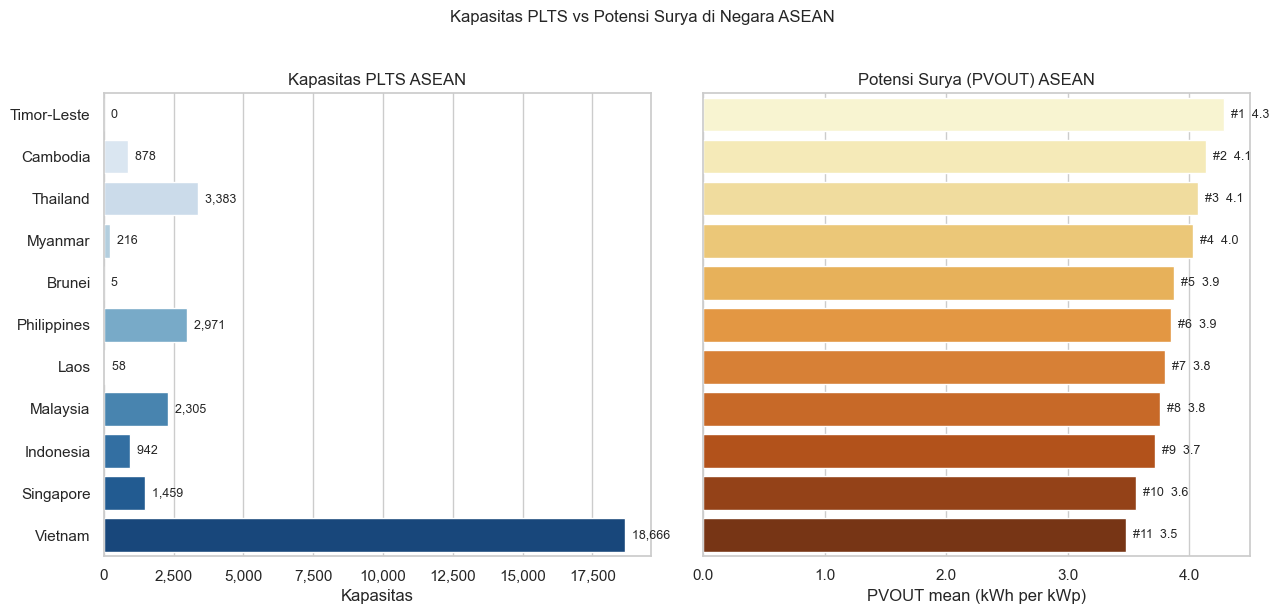

In [18]:
# Standarisasi key negara untuk merge
kap = kapasitas_plts_sea.copy()
kap['country_key'] = (
    kap['negara']
    .astype(str)
    .str.replace(r'\s*\(the\)\s*', '', regex=True)
    .str.strip()
    .str.lower()
    .replace(name_fix)  # gunakan mapping yang sudah didefinisikan di atas
)

# Pastikan angka kapasitas numerik
kap['kapasitas_num'] = (
    kap['kapasitas plts'].astype(str)
    .str.replace(r'[^\d\.\-]', '', regex=True)
    .replace({'': None})
    .astype(float)
)

pv = potensi_surya_sea.copy()
pv['country_key'] = pv['Country'].astype(str).str.strip().str.lower()

# Gabungkan berdasarkan negara, urutan mengikuti Rank PVOUT
merged = pv.merge(
    kap[['country_key', 'kapasitas_num', 'negara']],
    on='country_key', how='left'
).sort_values('Rank')

# Pakai urutan negara sesuai ranking PVOUT
y_order = merged['Country']

# Plot 2 bar chart horizontal berdampingan
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

# Kiri: Kapasitas PLTS
sns.barplot(
    ax=axes[0], data=merged,
    y='Country', x='kapasitas_num',
    order=y_order, palette='Blues'
)
axes[0].set_title('Kapasitas PLTS ASEAN')
axes[0].set_xlabel('Kapasitas')
axes[0].set_ylabel('')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
for p, val in zip(axes[0].patches, merged['kapasitas_num']):
    y = p.get_y() + p.get_height()/2
    if pd.notnull(val):
        axes[0].text(p.get_width(), y, f'  {val:,.0f}', va='center', ha='left', fontsize=9)
    else:
        axes[0].text(0, y, '  n/a', va='center', ha='left', fontsize=9, color='gray')

# Kanan: PVOUT mean (urut Rank)
sns.barplot(
    ax=axes[1], data=merged,
    y='Country', x='PVOUT_mean_kWh_per_kWp',
    order=y_order, palette='YlOrBr'
)
axes[1].set_title('Potensi Surya (PVOUT) ASEAN')
axes[1].set_xlabel('PVOUT mean (kWh per kWp)')
axes[1].set_ylabel('')
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.1f}'))
for p, (val, rk) in zip(axes[1].patches, zip(merged['PVOUT_mean_kWh_per_kWp'], merged['Rank'])):
    y = p.get_y() + p.get_height()/2
    axes[1].text(p.get_width(), y, f'  #{rk}  {val:,.1f}', va='center', ha='left', fontsize=9)

plt.suptitle('Kapasitas PLTS vs Potensi Surya di Negara ASEAN', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# (Opsional) simpan gambar
# plt.savefig('vis 1/paired_asean_pvout_kapasitas.png', dpi=150, bbox_inches='tight')

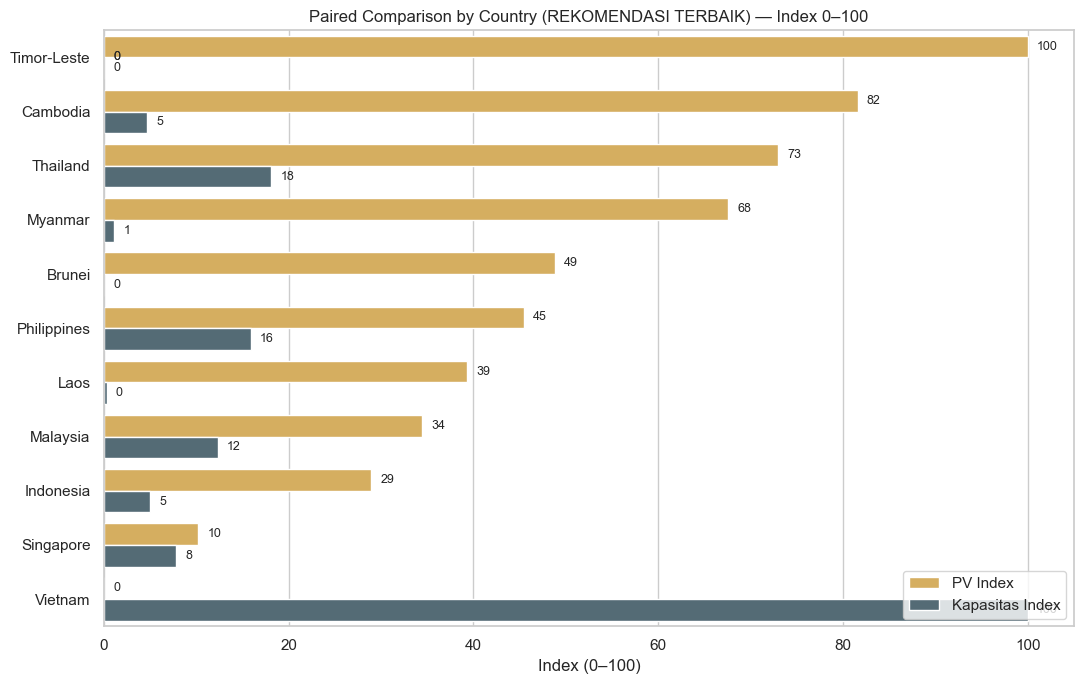

,Country,PV Index,Kapasitas Index,Gap
0,Timor-Leste,100.000000,0.000000,100.000000
1,Cambodia,81.584092,4.699379,76.884713
3,Myanmar,67.531925,1.154996,66.376929
2,Thailand,72.926612,18.119702,54.806910
4,Brunei,48.785869,0.025662,48.760208
6,Laos,39.356719,0.309067,39.047652
5,Philippines,45.480475,15.915090,29.565385
8,Indonesia,28.934878,5.043322,23.891556
7,Malaysia,34.434101,12.348259,22.085841
9,Singapore,10.234348,7.814208,2.420140


In [19]:
# Jika belum ada 'merged' dari sel sebelumnya, siapkan ulang cepat
try:
    merged
except NameError:
    kap = kapasitas_plts_sea.copy()
    kap['country_key'] = (
        kap['negara'].astype(str)
        .str.replace(r'\s*\(the\)\s*', '', regex=True)
        .str.strip().str.lower()
        .replace(name_fix)
    )
    kap['kapasitas_num'] = (
        kap['kapasitas plts'].astype(str)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .replace({'': None}).astype(float)
    )
    pv = potensi_surya_sea.copy()
    pv['country_key'] = pv['Country'].astype(str).str.strip().str.lower()
    merged = pv.merge(
        kap[['country_key', 'kapasitas_num', 'negara']],
        on='country_key', how='left'
    ).sort_values('Rank')

# Normalisasi min–max ke 0–100
def minmax_0_100(s: pd.Series) -> pd.Series:
    s = s.astype(float)
    s_min, s_max = s.min(skipna=True), s.max(skipna=True)
    if pd.isna(s_min) or pd.isna(s_max):
        return s * np.nan
    if s_max == s_min:
        return s.apply(lambda x: 100.0 if pd.notnull(x) else np.nan)
    return (s - s_min) / (s_max - s_min) * 100.0

plot_df = merged[['Country', 'PVOUT_mean_kWh_per_kWp', 'kapasitas_num']].copy()
plot_df['PV Index'] = minmax_0_100(plot_df['PVOUT_mean_kWh_per_kWp'])
plot_df['Kapasitas Index'] = minmax_0_100(plot_df['kapasitas_num'])

# Long format untuk 2 bar berdampingan
long_df = plot_df.melt(
    id_vars='Country',
    value_vars=['PV Index', 'Kapasitas Index'],
    var_name='Metrik',
    value_name='Index'
).dropna(subset=['Index'])

# Urutan negara mengikuti rank PVOUT
y_order = merged['Country']

# Plot paired comparison
sns.set_theme(style='whitegrid')
plt.figure(figsize=(11, 7))
ax = sns.barplot(
    data=long_df, y='Country', x='Index', hue='Metrik',
    order=y_order, palette={'PV Index': '#E9B44C', 'Kapasitas Index': '#4F6D7A'}
)

ax.set_title('Paired Comparison by Country (REKOMENDASI TERBAIK) — Index 0–100')
ax.set_xlabel('Index (0–100)')
ax.set_ylabel('')
ax.set_xlim(0, 105)
ax.legend(title='', loc='lower right')

# Label nilai index di ujung bar
for p in ax.patches:
    w = p.get_width()
    if np.isnan(w):
        continue
    y = p.get_y() + p.get_height()/2
    ax.text(w + 1, y, f'{w:.0f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# (Opsional) lihat gap untuk insight: PV Index - Kapasitas Index
gap_df = (
    plot_df[['Country', 'PV Index', 'Kapasitas Index']]
    .assign(Gap=lambda d: d['PV Index'] - d['Kapasitas Index'])
    .sort_values('Gap', ascending=False)
)
gap_df.head(10)

## Visualisasi 3

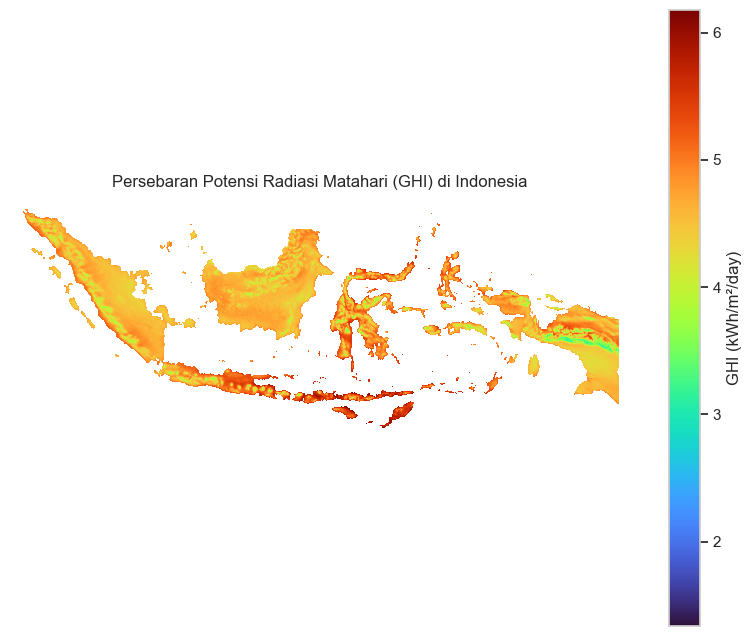

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("vis 3/GHI.tif") as src:
    ghi = src.read(1)
    nodata = src.nodata

if nodata is not None:
    ghi = np.ma.masked_equal(ghi, nodata)

plt.figure(figsize=(10, 8))
plt.imshow(ghi, cmap="turbo")
plt.colorbar(label="GHI (kWh/m²/day)")
plt.title("Persebaran Potensi Radiasi Matahari (GHI) di Indonesia")
plt.axis("off")
plt.show()


## Visualisasi 4

In [20]:
solar_generation = pd.read_csv('vis 4/Plant_1_Generation_Data.csv')
solar_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [21]:
solar_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


Preprocess

In [22]:
solar_generation["DATE_TIME"] = pd.to_datetime(
    solar_generation["DATE_TIME"],
    format="%d-%m-%Y %H:%M"
)

solar_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


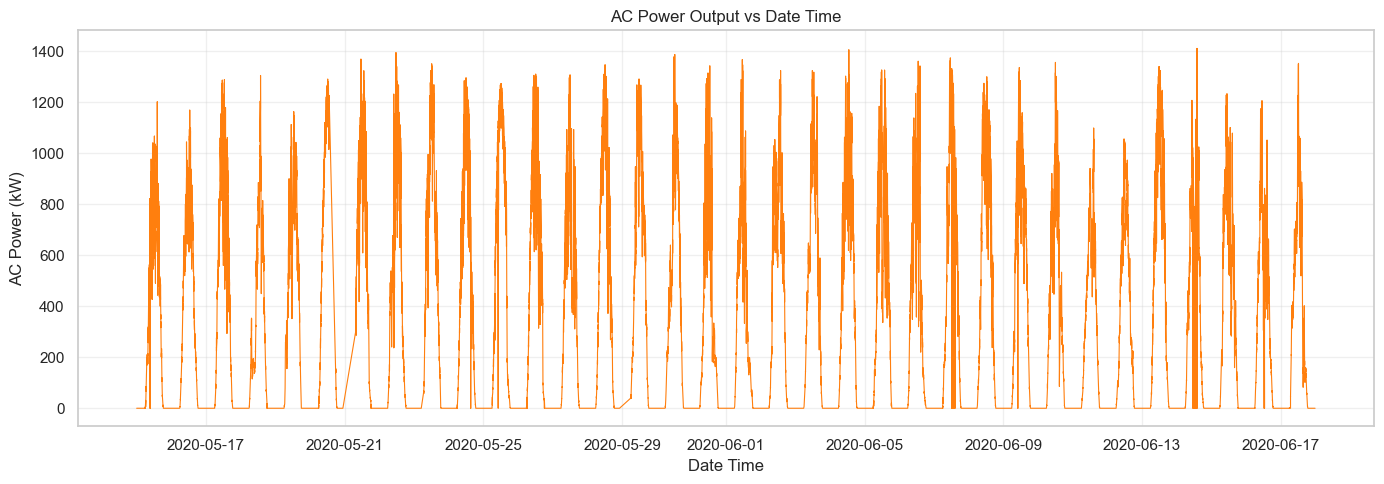

In [23]:
# Pastikan AC_POWER numerik
solar_generation["AC_POWER"] = pd.to_numeric(
    solar_generation["AC_POWER"], errors="coerce"
)

# Urutkan berdasarkan waktu
solar_generation = solar_generation.sort_values("DATE_TIME")

plt.figure(figsize=(14, 5))
plt.plot(
    solar_generation["DATE_TIME"],
    solar_generation["AC_POWER"],
    color="tab:orange",
    linewidth=0.8
)
plt.title("AC Power Output vs Date Time")
plt.xlabel("Date Time")
plt.ylabel("AC Power (kW)")  # sesuaikan satuan kalau berbeda
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
daily = (
    solar_generation
    .set_index("DATE_TIME")
    .resample("D")["AC_POWER"]
    .sum()
    .reset_index()
)

daily.columns = ["ds", "y"]
daily.head()


,ds,y
0,2020-05-15,550830.959402
1,2020-05-16,568359.821428
2,2020-05-17,660975.389285
3,2020-05-18,470969.708929
4,2020-05-19,532250.491070


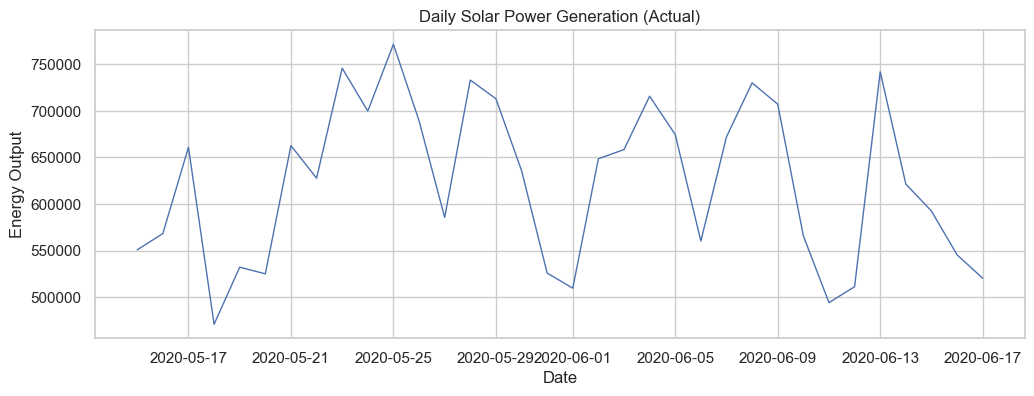

In [25]:
plt.figure(figsize=(12,4))
plt.plot(daily["ds"], daily["y"], linewidth=1)
plt.title("Daily Solar Power Generation (Actual)")
plt.xlabel("Date")
plt.ylabel("Energy Output")
plt.show()

Split

In [26]:
split_date = daily["ds"].quantile(0.8)
train = daily[daily["ds"] <= split_date].copy()
test  = daily[daily["ds"] >  split_date].copy()

In [27]:
from sklearn.metrics import mean_absolute_error

ETS

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets = ExponentialSmoothing(
    train["y"],
    trend="add",
    seasonal="add",
    seasonal_periods=7  # mingguan
).fit()

test["yhat_ets"] = ets.forecast(len(test))
mae_ets = mean_absolute_error(test["y"], test["yhat_ets"])
mae_ets


c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


158330.36846731303

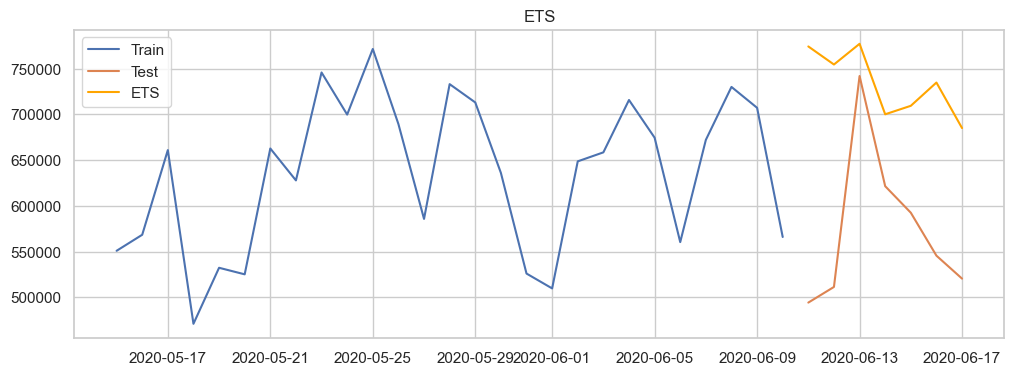

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(test["ds"], test["y"], label="Test")
plt.plot(test["ds"], test["yhat_ets"], label="ETS", color="orange")
plt.legend()
plt.title("ETS")
plt.show()

ARIMA

In [30]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train["y"], order=(1,1,1)).fit()
test["yhat_arima"] = arima.forecast(steps=len(test))
mae_arima = mean_absolute_error(test["y"], test["yhat_arima"])
mae_arima

c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


66788.11591427564

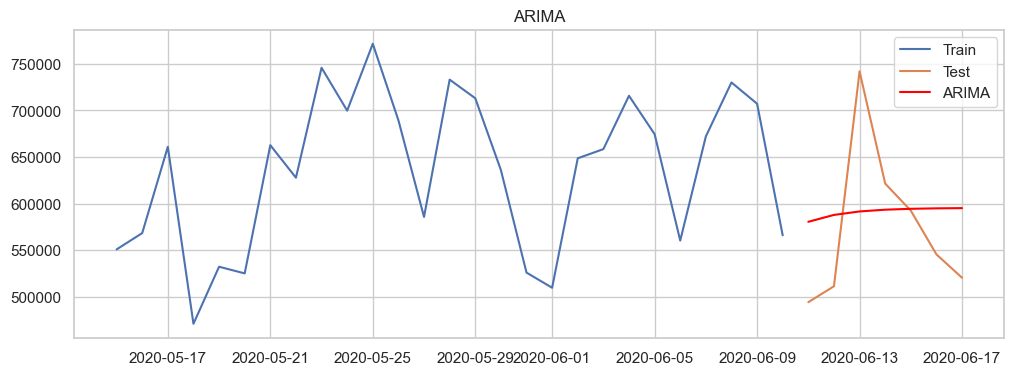

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(test["ds"], test["y"], label="Test")
plt.plot(test["ds"], test["yhat_arima"], label="ARIMA", color="red")
plt.legend()
plt.title("ARIMA")
plt.show()

SARIMA

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(
    train["y"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

test["yhat_sarima"] = sarima.forecast(steps=len(test))
mae_sarima = mean_absolute_error(test["y"], test["yhat_sarima"])
mae_sarima

c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


157509.0277712655

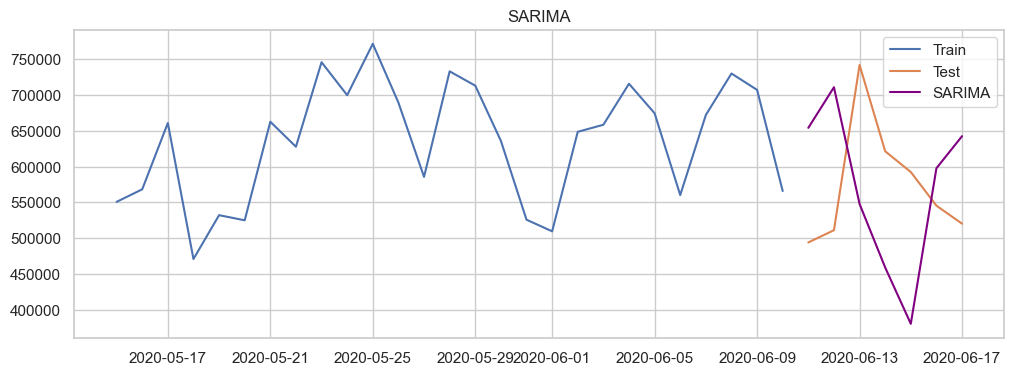

In [33]:
plt.figure(figsize=(12,4))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(test["ds"], test["y"], label="Test")
plt.plot(test["ds"], test["yhat_sarima"], label="SARIMA", color="purple")
plt.legend(); plt.title("SARIMA"); plt.show()

PROPHET

In [34]:
from prophet import Prophet

m = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)
m.fit(train)

forecast = m.predict(test[["ds"]])
test["yhat_prophet"] = forecast["yhat"].values
mae_prophet = mean_absolute_error(test["y"], test["yhat_prophet"])
mae_prophet

22:43:44 - cmdstanpy - INFO - Chain [1] start processing
22:43:45 - cmdstanpy - INFO - Chain [1] done processing


652068.4341487968

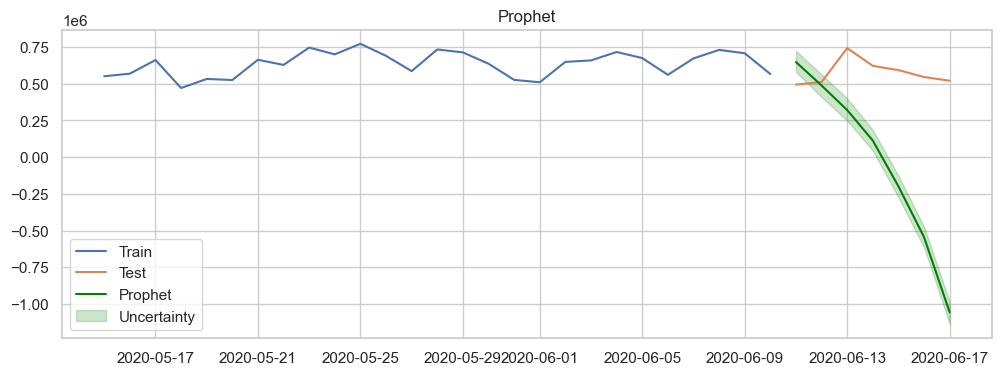

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(test["ds"], test["y"], label="Test")
plt.plot(test["ds"], test["yhat_prophet"], label="Prophet", color="green")
plt.fill_between(
    forecast["ds"],
    forecast["yhat_lower"],
    forecast["yhat_upper"],
    color="green", alpha=0.2, label="Uncertainty"
)
plt.legend(); plt.title("Prophet"); plt.show()

Perbandingan Hasil

In [36]:
results = {
    "ETS": mae_ets,
    "ARIMA": mae_arima,
    "SARIMA": mae_sarima,
    "Prophet": mae_prophet
}
results

{'ETS': 158330.36846731303,
 'ARIMA': 66788.11591427564,
 'SARIMA': 157509.0277712655,
 'Prophet': 652068.4341487968}

Visualisasi Final

In [37]:
sarima_model = SARIMAX(
    train["y"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Aufii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
n_forecast = 14

forecast_values = sarima_model.forecast(n_forecast)

last_date = daily["ds"].iloc[-1]
forecast_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=n_forecast,
    freq="D"
)

forecast_df = pd.DataFrame({
    "ds": forecast_dates,
    "yhat": forecast_values.values
})


In [39]:
plot_df = pd.concat([
    daily[["ds", "y"]].rename(columns={"y": "value"}),
    forecast_df.rename(columns={"yhat": "value"})
])


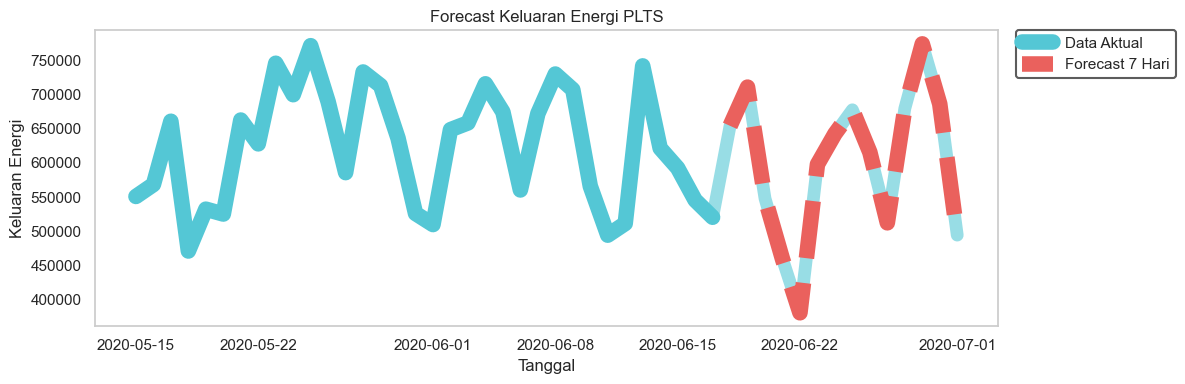

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
ax = plt.gca()      # ambil axes sekarang
ax.grid(False)      # matikan grid / garis-garis abu

# Data historis (actual)
plt.plot(
    daily["ds"],
    daily["y"],
    label="Data Aktual",
    linewidth=11.2,
    color="#54c7d5"
)

# Garis penghubung (historis → forecast)
plt.plot(
    plot_df["ds"],
    plot_df["value"],
    linewidth=9.2,
    color="#54c7d5",
    alpha=0.6
)

# Forecast SARIMA (TEBAL & PUTUS-PUTUS)
plt.plot(
    forecast_df["ds"],
    forecast_df["yhat"],
    label="Forecast 7 Hari",
    linewidth=11.2,
    linestyle="--",
    color="#ea615d"
)

plt.title("Forecast Keluaran Energi PLTS")
plt.xlabel("Tanggal")
plt.ylabel("Keluaran Energi")

# kasih ruang di kanan untuk legend
plt.subplots_adjust(right=0.8)

# legend di luar dengan border
leg = plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # geser keluar ke kanan
    borderaxespad=0.0,
    frameon=True,
    fancybox=True
)
leg.get_frame().set_linewidth(1.5)      # ketebalan border
leg.get_frame().set_edgecolor("#333")   # warna border

plt.tight_layout()
plt.show()

In [41]:
from matplotlib import font_manager, rcParams
from pathlib import Path

font_dir = Path("fonts/Poppins")

# Daftarin semua file font Poppins di folder itu
for font_path in font_dir.glob("*.ttf"):
    font_manager.fontManager.addfont(str(font_path))
for font_path in font_dir.glob("*.otf"):
    font_manager.fontManager.addfont(str(font_path))

# Set default font ke Poppins
rcParams["font.family"] = "Poppins"

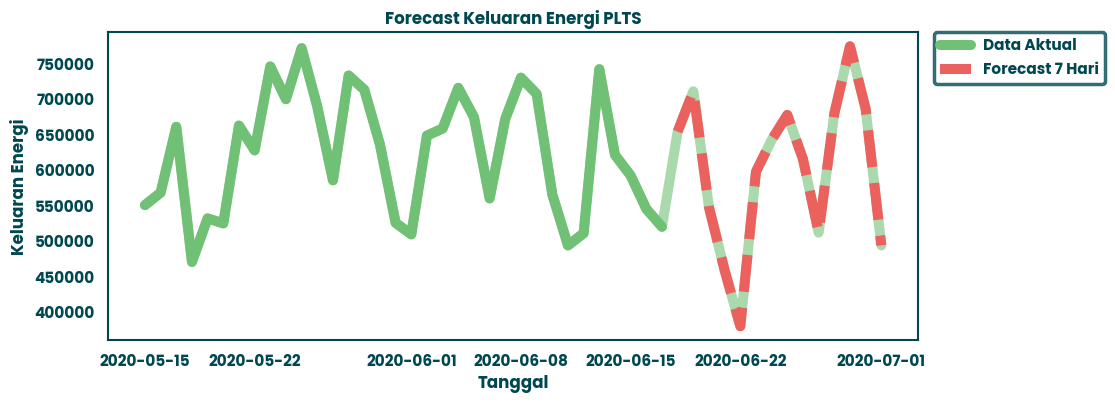

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
ax = plt.gca()      # ambil axes sekarang
ax.grid(False)      # matikan grid / garis-garis abu

# Data historis (actual)
plt.plot(
    daily["ds"],
    daily["y"],
    label="Data Aktual",
    linewidth=7.2,
    color="#70c075"
)

# Garis penghubung (historis → forecast)
plt.plot(
    plot_df["ds"],
    plot_df["value"],
    linewidth=7.2,
    color="#70c075",
    alpha=0.6
)

# Forecast SARIMA (TEBAL & PUTUS-PUTUS)
plt.plot(
    forecast_df["ds"],
    forecast_df["yhat"],
    label="Forecast 7 Hari",
    linewidth=7.2,
    linestyle="--",
    color="#ea615d"
)

plt.title(
    "Forecast Keluaran Energi PLTS",
    fontweight="bold",
    color="#004851"
)
plt.xlabel("Tanggal", fontweight="bold", color="#004851")
plt.ylabel("Keluaran Energi", fontweight="bold", color="#004851")

# styling sumbu & angka
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor("#004851")
    spine.set_linewidth(1.5)

for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_color("#004851")
    lbl.set_fontweight("bold")

plt.subplots_adjust(right=0.8)

leg = plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0.0,
    frameon=True,
    fancybox=True,
)

# outline legend
frame = leg.get_frame()
frame.set_linewidth(2.5)          # lebih tebal
frame.set_edgecolor("#004851")   # kotak biru tua

# teks legend agak bold + warna sama
for txt in leg.get_texts():
    txt.set_fontweight("bold")
    txt.set_color("#004851")      # biar kontras di atas biru tua

Residual (nunjukin fluktuasi)

In [43]:
daily["sarima_fitted"] = sarima_model.fittedvalues
daily["residual"] = daily["y"] - daily["sarima_fitted"]

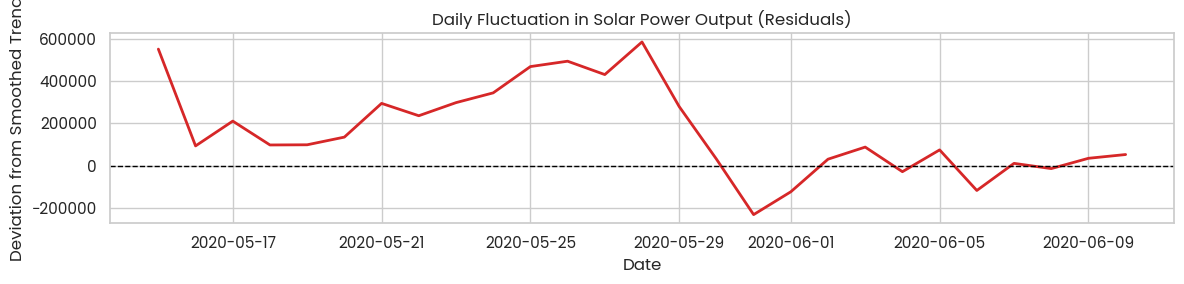

In [44]:
plt.figure(figsize=(12, 3))

plt.plot(
    daily["ds"],
    daily["residual"],
    linewidth=2,
    color="#d62728"
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.title("Daily Fluctuation in Solar Power Output (Residuals)")
plt.xlabel("Date")
plt.ylabel("Deviation from Smoothed Trend")
plt.tight_layout()
plt.show()


## Visualisasi 5

In [45]:
from matplotlib import rcParams

rcParams["font.family"] = "Poppins"

In [46]:
import pandas as pd

data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "BBM": [6.5, 5.6, 5.6, 3.6, 2.9, 3.2, 2.7],
    "Gas": [25.9, 22.9, 21.7, 21.4, 16.8, 17.2, 16.0],
    "Batubara": [54.7, 58.4, 60.3, 63.0, 66.3, 66.0, 67.2],
    "EBT": [13.0, 13.1, 12.4, 12.0, 14.0, 13.7, 14.1]
}

df = pd.DataFrame(data)

In [47]:
import matplotlib.pyplot as plt

PRIMARY_COLOR = "#004851"

def apply_custom_style(
    ax=None,
    title=None,
    xlabel=None,
    ylabel=None,
    show_legend=True,
    legend_loc="upper left",
    legend_out=True,
):
    if ax is None:
        ax = plt.gca()

    # Matikan grid default
    ax.grid(False)

    # Styling spines (kotak sumbu)
    for spine in ax.spines.values():
        spine.set_edgecolor(PRIMARY_COLOR)
        spine.set_linewidth(1.5)

    # Styling tick labels
    for lbl in ax.get_xticklabels() + ax.get_yticklabels():
        lbl.set_color(PRIMARY_COLOR)
        lbl.set_fontweight("bold")

    # Judul & label sumbu
    if title is not None:
        ax.set_title(title, fontweight="bold", color=PRIMARY_COLOR)
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontweight="bold", color=PRIMARY_COLOR)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontweight="bold", color=PRIMARY_COLOR)

    # Legend berkotak
    leg = None
    if show_legend:
        if legend_out:
            plt.subplots_adjust(right=0.8)
            leg = ax.legend(
                loc=legend_loc,
                bbox_to_anchor=(1.02, 1.0),
                borderaxespad=0.0,
                frameon=True,
                fancybox=True,
            )
        else:
            leg = ax.legend(frameon=True, fancybox=True)

    if leg is not None:
        frame = leg.get_frame()
        frame.set_linewidth(2.5)
        frame.set_edgecolor(PRIMARY_COLOR)
        for txt in leg.get_texts():
            txt.set_fontweight("bold")
            txt.set_color(PRIMARY_COLOR)

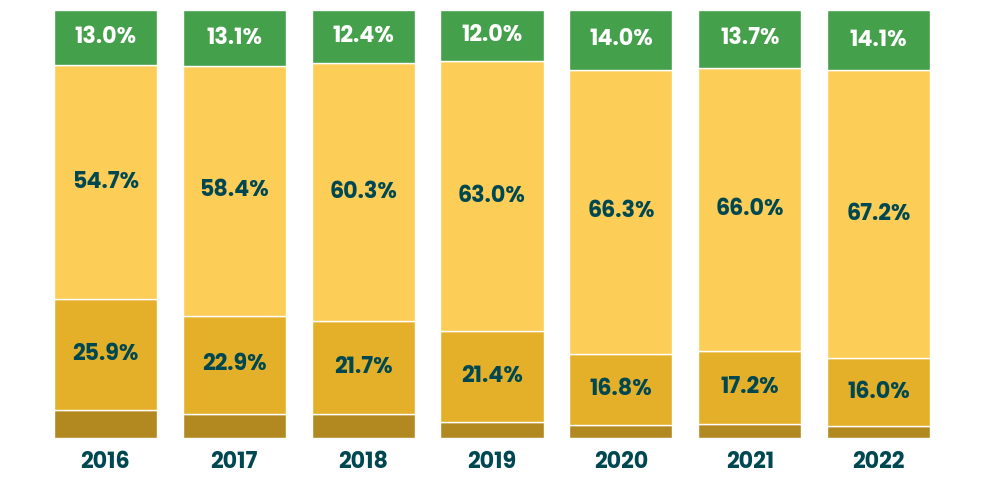

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))

categories = ["BBM", "Gas", "Batubara", "EBT"]
colors = ["#b28820", "#e4af29", "#fccd57", "#45a04b"]

bottom = np.zeros(len(df))

for cat, color in zip(categories, colors):
    values = df[cat].values
    ax.bar(
        df["Year"],
        values,
        bottom=bottom,
        label=cat,
        color=color,
        edgecolor="white",
    )

    # label persen di dalam bar (dibesarkan)
    for i, v in enumerate(values):
        if cat == "BBM":
            continue  # jangan tampilin label untuk BBM
        if v > 3:
            text_color = "#004851" if cat != "EBT" else "white"
            ax.text(
                df["Year"][i],
                bottom[i] + v / 2,
                f"{v:.1f}%",
                ha="center",
                va="center",
                fontsize=16,
                color=text_color,
                fontweight="bold",
            )

    bottom += values

# batas sumbu Y
ax.set_ylim(0, 100)

ax.set_xticks(df["Year"])
ax.set_xticklabels(
    df["Year"],
    fontsize=16,
    fontweight="bold",
    color="#004851"
)

ax.set_yticks([])
ax.tick_params(axis="y", left=False, labelleft=False)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(False)

plt.tight_layout()
plt.show()